Quantile Loss for 10.0th percentile: 0.2286
Quantile Loss for 50.0th percentile: 0.5489
Quantile Loss for 90.0th percentile: 0.2674


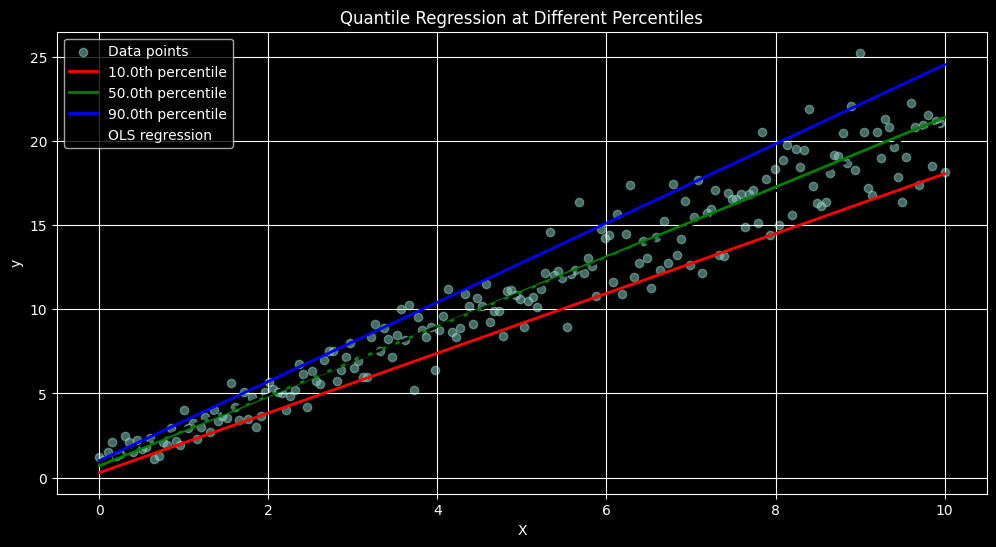


Example predictions at x = 5
10th percentile: 9.17
50th percentile: 11.05
90th percentile: 12.77


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def quantile_loss(y_true, y_pred, quantile):
    """
    Calculate the quantile loss between true and predicted values.
    
    Args:
        y_true: Array of true values
        y_pred: Array of predicted values
        quantile: The desired quantile (between 0 and 1)
    
    Returns:
        Float: The quantile loss value
    """
    error = y_true - y_pred
    return np.mean(np.maximum(quantile * error, (quantile - 1) * error))

def fit_quantile_regression(X, y, quantile, learning_rate=0.01, epochs=1000):
    """
    Implement a simple quantile regression using gradient descent.
    
    Args:
        X: Input features
        y: Target values
        quantile: The desired quantile (between 0 and 1)
        learning_rate: Learning rate for gradient descent
        epochs: Number of training iterations
    
    Returns:
        tuple: (slope, intercept) of the fitted line
    """
    # Initialize parameters
    theta = np.zeros(2)  # [slope, intercept]
    X_b = np.c_[np.ones(len(X)), X]  # Add bias term
    
    # Gradient descent
    for _ in range(epochs):
        y_pred = X_b @ theta
        error = y - y_pred
        
        # Gradient of quantile loss
        grad = np.zeros(2)
        for i in range(len(X)):
            if error[i] >= 0:
                grad += -quantile * X_b[i]
            else:
                grad += (1 - quantile) * X_b[i]
        
        # Update parameters
        theta -= learning_rate * grad / len(X)
    
    return theta[1], theta[0]  # Return slope, intercept

# Generate synthetic data with heteroscedastic noise
np.random.seed(42)
X = np.linspace(0, 10, 200)
noise = np.random.normal(0, 0.5 + X/5, 200)  # Noise increases with X
y = 2 * X + 1 + noise

# Store results for different quantiles
results = {}
quantiles = [0.1, 0.5, 0.9]
colors = ['r', 'g', 'b']

plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.5, label='Data points')

# Fit and plot quantile regression lines
for q, c in zip(quantiles, colors):
    # Fit the quantile regression and store results
    slope, intercept = fit_quantile_regression(X, y, q)
    results[q] = {'slope': slope, 'intercept': intercept}
    
    # Generate predictions and plot
    y_pred = slope * X + intercept
    plt.plot(X, y_pred, c, label=f'{q*100}th percentile', linewidth=2)
    
    # Calculate and print the loss
    loss = quantile_loss(y, y_pred, q)
    print(f"Quantile Loss for {q*100}th percentile: {loss:.4f}")

# Add regular linear regression for comparison
reg = LinearRegression().fit(X.reshape(-1, 1), y)
y_pred_reg = reg.predict(X.reshape(-1, 1))
plt.plot(X, y_pred_reg, 'k--', label='OLS regression', linewidth=2)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Quantile Regression at Different Percentiles')
plt.legend()
plt.grid(True)
plt.show()

# Demonstrate pinball loss calculation for a specific example
x_example = 5
y_true_example = 2 * x_example + 1

# Calculate predictions using stored results
predictions = {
    '10th percentile': results[0.1]['slope'] * x_example + results[0.1]['intercept'],
    '50th percentile': results[0.5]['slope'] * x_example + results[0.5]['intercept'],
    '90th percentile': results[0.9]['slope'] * x_example + results[0.9]['intercept']
}

print("\nExample predictions at x =", x_example)
for quantile, pred in predictions.items():
    print(f"{quantile}: {pred:.2f}")